<h3>Importing libraries</h3>

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from tpot import TPOTRegressor
from sklearn.svm import LinearSVR
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import xgboost as xgb
from lazypredict.Supervised import LazyRegressor

<h3>Read dataset</h3>

In [2]:
data = pd.read_csv("PO_MSD.csv")
data.head(10)

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,is_incident,incident_type,incident_hours,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-01-01,PO,CR_LI_HOL/Zalisz K,MSD,946.0,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-04,PO,CR_LI_HOL/Zalisz K,MSD,624.0,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-07,PO,CR_LI_HOL/Zalisz K,MSD,890.0,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2022-02-15,PO,CR_LI_HOL/Zalisz K,MSD,1140.0,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2022-02-19,PO,CR_LI_HOL/Zalisz K,MSD,1283.0,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,2022-02-22,PO,CR_LI_HOL/Zalisz K,MSD,903.0,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,2022-02-26,PO,CR_LI_HOL/Zalisz K,MSD,1340.0,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,2022-02-28,PO,CR_LI_HOL/Zalisz K,MSD,2002.0,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,2022-03-02,PO,CR_LI_HOL/Zalisz K,MSD,601.0,NaN,NaN,0,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
9,2022-03-05,PO,CR_LI_HOL/Zalisz K,MSD,1195.0,NaN,NaN,0,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [3]:
data.columns

Index(['date', 'product_category', 'reseller_name', 'reseller', 'sales',
       'incident_start_date', 'incident_end_date', 'is_incident',
       'incident_type', 'incident_hours', 'incident_days', 'is_holiday',
       'holiday', 'Monat', 'Wochentag', 'Month_k', 'Holiday_1', 'Incident_1',
       'Weekdays_Monday', 'Weekdays_Saturday', 'Weekdays_Thursday',
       'Weekdays_Tuesday', 'Weekdays_Wednesday', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [7]:
X = data[['Holiday_1', 'Incident_1', 
            'Weekdays_Monday', 'Weekdays_Saturday', 'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday',
            'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']]

y = data['sales']

<h3>Using xgboost regressor</h3>

In [8]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<h3>Using random forest</h3>

In [9]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X, y)

RandomForestRegressor()

<h3>Ploting important features</h3>

[0.21815023 0.03444811 0.03559028 0.04628973 0.02775393 0.04132874
 0.06207594 0.01870531 0.0200176  0.01929682 0.03921222 0.02494417
 0.01434374 0.02315118 0.07024961 0.01874654 0.1839707  0.10172521]


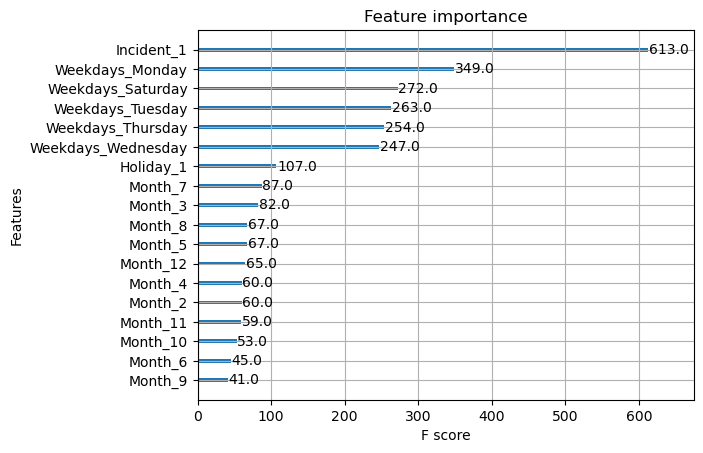

In [11]:
xgb.plot_importance(xgb_reg)
print(xgb_reg.feature_importances_)

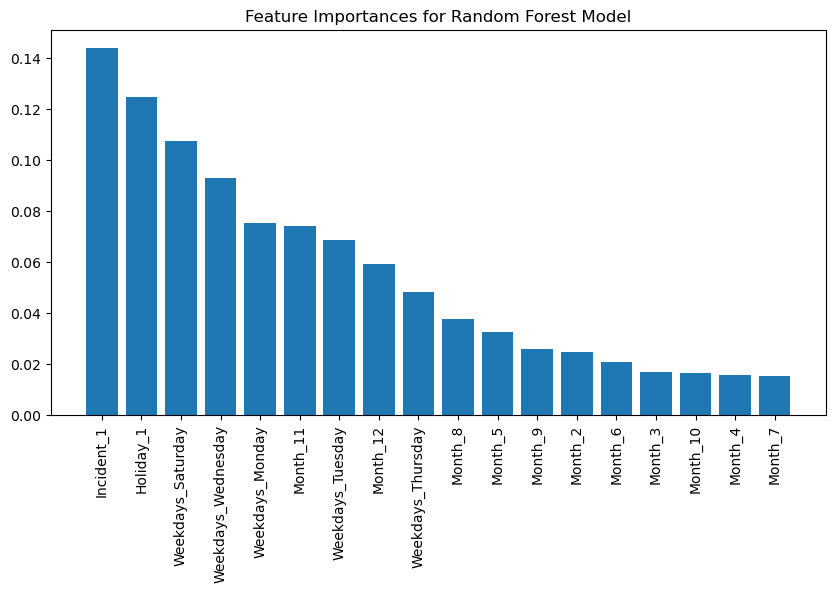

In [17]:
import matplotlib.pyplot as plt

# Get feature importances from Random Forest model
importances = rf_reg.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create plot
plt.figure(figsize=(10,5))
plt.title("Feature Importances for Random Forest Model")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

<h3>Models performance measure using r squared value</h3>

In [18]:

# Calculate R-squared and adjusted R-squared for XGBoost model
y_pred_xgb = xgb_reg.predict(X)
r2_xgb = r2_score(y, y_pred_xgb)
adj_r2_xgb = 1 - (1 - r2_xgb) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

# Print R-squared and adjusted R-squared for XGBoost model
print("XGBoost Model R-squared:", r2_xgb)
print("XGBoost Model Adjusted R-squared:", adj_r2_xgb)

# Calculate R-squared and adjusted R-squared for Random Forest model
y_pred_rf = rf_reg.predict(X)
r2_rf = r2_score(y, y_pred_rf)
adj_r2_rf = 1 - (1 - r2_rf) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

# Print R-squared and adjusted R-squared for Random Forest model
print("\nRandom Forest Model R-squared:", r2_rf)
print("Random Forest Model Adjusted R-squared:", adj_r2_rf)

XGBoost Model R-squared: 0.5898783278869961
XGBoost Model Adjusted R-squared: 0.5715602383137106

Random Forest Model R-squared: 0.5723303630172863
Random Forest Model Adjusted R-squared: 0.5532284933753786


<h3>Calculating loss </h3>

In [23]:
# Calculate MAE and MSE
mae = mean_absolute_error(y, y_pred_xgb)
mse = mean_squared_error(y, y_pred_xgb)

# Print the results
print("mean_absolute_error or L1 Loss:", mae)
print("mean_squared_error or L2 Loss:", mse)

mean_absolute_error or L1 Loss: 140.44103696560973
mean_squared_error or L2 Loss: 44819.56368961239


In [24]:
y_pred_xgb

array([ 932.3205 ,  696.73425,  939.97797,  964.5415 , 1221.7089 ,
        964.5415 , 1221.7089 , 1481.9567 ,  606.1578 , 1138.5813 ,
       1014.54034, 1135.9907 ,  958.11334,  608.77014, 1135.9907 ,
        255.17598, 1135.9907 ,  134.65178,  729.79486,  965.5181 ,
        701.15076,  860.5435 ,  900.4841 ,  712.1706 ,  119.06901,
        965.5181 , 1122.6085 ,  964.5867 , 1191.0404 ,  964.5867 ,
        540.35706, 1287.3016 , 1191.0404 ,  927.3315 ,  964.5867 ,
        540.35706, 1287.3016 , 1191.0404 ,  964.5867 , 1143.1953 ,
       1143.2433 ,  781.6335 ,  808.72974, 1143.1953 ,  808.72974,
       1143.1953 , 1143.2433 ,  781.6335 ,  689.68695,  808.72974,
       1133.6366 , 1143.1953 , 1968.2145 ,  785.78577, 1077.1157 ,
        777.79944,  777.79944,  839.02856, 1079.4897 ,  777.79944,
        839.02856, 1079.4897 , 1077.1157 , 1166.5775 ,  597.28625,
       1166.5775 ,  597.28625,  725.3923 ,  597.28625,  124.58134,
        687.5031 , 1282.5408 , 1282.5408 ,  750.6779 , 1134.92

In [26]:
data['incident_hours'].isnull().sum()

210

In [29]:
data['incident_hours'].value_counts()

1.00      28
2.00      26
3.00      19
5.00      14
4.00      13
          ..
20.00      1
77.00      1
65.00      1
21.00      1
363.00     1
Name: incident_hours, Length: 65, dtype: int64

In [28]:
data['incident_hours'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
417   198.00
418   185.00
419   175.00
420   294.00
421   363.00
Name: incident_hours, Length: 422, dtype: float64>

In [30]:
data['Incident_1']

0      0
1      0
2      0
3      0
4      0
      ..
417    1
418    1
419    1
420    1
421    1
Name: Incident_1, Length: 422, dtype: int64

In [31]:


# Calculate mean, median, and mode of the 'incident_hours' column
mean_val = data['incident_hours'].mean()
median_val = data['incident_hours'].median()
mode_val = data['incident_hours'].mode().iloc[0]

# Fill missing values using the mean
data['incident_hours_mean'] = data['incident_hours'].fillna(mean_val)

# Fill missing values using the median
data['incident_hours_median'] = data['incident_hours'].fillna(median_val)

# Fill missing values using the mode
data['incident_hours_mode'] = data['incident_hours'].fillna(mode_val)

In [47]:
data['incident_hours_mean'].tail(11)



411   145.00
412   144.00
413    91.00
414   140.00
415   139.00
416   179.00
417   198.00
418   185.00
419   175.00
420   294.00
421   363.00
Name: incident_hours_mean, dtype: float64

In [46]:
data['incident_hours_median'].tail(10)

412   144.00
413    91.00
414   140.00
415   139.00
416   179.00
417   198.00
418   185.00
419   175.00
420   294.00
421   363.00
Name: incident_hours_median, dtype: float64

In [40]:
data['incident_hours_mode'].tail(10)

412   144.00
413    91.00
414   140.00
415   139.00
416   179.00
417   198.00
418   185.00
419   175.00
420   294.00
421   363.00
Name: incident_hours_mode, dtype: float64

In [48]:
data['incident_hours'].tail(10)

412   144.00
413    91.00
414   140.00
415   139.00
416   179.00
417   198.00
418   185.00
419   175.00
420   294.00
421   363.00
Name: incident_hours, dtype: float64

In [50]:


data['incident_hours'].tail(11)
data['incident_days'].tail(11)

411    8.00
412    8.00
413    8.00
414    9.00
415    9.00
416   10.00
417   12.00
418   12.00
419   13.00
420   13.00
421   18.00
Name: incident_days, dtype: float64

In [51]:
data['incident_days'].describe()

count   212.00
mean      2.48
std       2.50
min       1.00
25%       1.00
50%       2.00
75%       3.00
max      18.00
Name: incident_days, dtype: float64